In [2]:
! pip install pandas
! pip install openml
! pip install nbconvert
! brew install pandoc
! pip install seaborn
! pip install sklearn

You should consider upgrading via the '/Users/nikolaus/Documents/Uni/TU/Machine Learning/1_dataset_description/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nikolaus/Documents/Uni/TU/Machine Learning/1_dataset_description/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/nikolaus/Documents/Uni/TU/Machine Learning/1_dataset_description/venv/bin/python -m pip install --upgrade pip' command.
Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 5 taps (homebrew/cask-versions, homebrew/services, gcenx/wine, homebrew/core and homebrew/cask).
==> New Formulae
asmfmt                     kin                        rawdog
autobrr                    kiota                      robin-map
c3c                        ktfmt                      rsyncy
cargo-llvm-cov             kubetui                    ruby@3.2
cekit                      libnsbmp                   scnlib
csvl

In [58]:
import pandas as pd
import seaborn as sns
import openml
import numpy as np


import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [59]:
"""
Downloading OpenML data
Parameters:
dataset_id: openml-dataset-id

x - An array/dataframe where each row represents one example with the corresponding feature values.
y - the classes for each example (target feature)
categorical_indicator - an array that indicates which feature is categorical
attribute_names - the names of the features for the examples (X) and
"""
def get_openml_data(dataset_id: int):
    data_source = openml.datasets.get_dataset(dataset_id=dataset_id)
    return data_source.get_data(
        dataset_format="dataframe", target=data_source.default_target_attribute
    )

In [60]:
"""
One-hot-encoding data

Parameters:

data: pd.DataFrame
column: str
delete: whether the original column should be deleted

Takes all unique values of column in data and creates a new column for each
with value 1 if the column is the current unique value and 0 if it isn't

Return the dataframe
"""
def one_hot(data: pd.DataFrame, column: str, prefix="", suffix="", delete=False) -> pd.DataFrame:
    for value in sorted(data[column].unique().tolist()):
        data[prefix+value+suffix] = data[column].apply(lambda x: 1 if x==value else 0)
    if delete: data = data.drop(column, axis=1)
    return data

In [61]:
"""
sklearn preprocessing pipelines
"""
# general preprocessor
# with MinMaxScaler
preprocessor = Pipeline(
   steps=[
       ("imputation", KNNImputer(n_neighbors=2, weights="uniform")),
       ("scaler", MinMaxScaler())
    ]
)

In [62]:
"""
shuffling two objects in the same way
input: two pandas objects whose orders correspond
output: the input objects, but with shuffled order, but their orders still correspond
"""
def shuffle(*objects):
    np.random.seed(42)
    new_index = np.random.permutation(objects[0].index)
    objects = [obj.reindex(new_index) for obj in objects]
    if len(objects) == 1: return objects[0]
    return objects


In [63]:
"""
Min-Max-Scaling

Parameters
vals: numpy array, numpy Series or pandas Series
min, max: minimum and maximum values to scale the values between
"""

def scale(vals, min:int, max:int):
    diff = max - min
    return (vals-min)/diff

def unscale(vals, min:int, max:int):
    diff = max - min
    return vals * diff + min


# Dataset 1: _Biomed_

ID: 481
https://www.openml.org/api/v1/json/data/481


February 23, 1982

The 1982 annual meetings of the American Statistical Association (ASA) will be held August 16-19, 1982 in Cincinnati. At that meeting, the ASA Committee on Statistical Graphics plans to sponsor an "Exposition of Statistical Graphics Technology." The purpose of this activity is to more fully inform the ASA membership about the capabilities and uses of computer graphcis in statistical work. This letter is to invite you to participate in the Exposition.


Attached is a set of biomedical data containing 209 observations (134 for "normals" and 75 for "carriers"). Each vendor of provider of statistical graphics software participating in the Exposition is to analyze these data using their software and to prepare tabular, graphical and text output illustrating the use of graphics in these analyses and summarizing their conclusions. The tabular and graphical materials must be direct computer output from the statistical graphics software; the textual descriptions and summaries need not be. The total display space available to each participant at the meeting will be a standard poster- board (approximately 4' x 2 1/2'). All entries will be displayed in one location at the meetings, together with brief written commentary by the committee summarizing the results of this activity.

## Reference

Exposition of Statistical Graphics Technology, L. H. Cox, M. M. Johnson, K. Kafadar, ASA Proc Stat. Comp Section, 1982, pp 55-56. Enclosures

## THE DATA

The following data arose in a study to develop screening methods to identify carriers of a rare genetic disorder. Four measurements m1, m2, m3, m4 were made on blood samples. One of these, m1, has been used before.


The disease is Duchenne muscular dystrophy. Measurements are:
M1- serum creatine kinase.
M2- hemopexin.
M3- pyruvate kinase.
M4- lactate dehydrogenase.

Because the disease is rare, there are only a few carriers of the disease from whom data are available. The data come in two files, one for normals and one for carriers of the disease. A description of the files is provided. The data have been stripped of the names and other identifiers. Otherwise the data are as received by the analyst.


## PURPOSE OF THE ANALYSIS

The purpose of the analysis is to develop a screening procedure to detect carriers and to describe its effectiveness. Experts in the field have noted that young people tend to have higher measurements. The laboratory which prepared the measurements is worried that there may be a systematic drift over time in their measurement process. These effects should be considered in the analysis. Can graphical displays show the differences between the distributions of carriers and normals?


## FILE DESCRIPTION
### Column Content

1 Observation number (sequence number per patient) Note that there are several samples per patient for some patients.
2-8 Blank 9-12 Hospital identification number for blood sample
13-18 Blank
19-20 Age of patient
21-26 Blank
27-32 Date that blood sample was taken (mmddyy) Note that all day entries are 00.
33-39 Blank 40-43 ml (measurement 1) sss.s
44-50 Blank
51-54 m2 (measurement 2) xxx.x Eight missing data points.
55-61 Blank
62-65 m3 (measurement 3) xxx.x
66-72 Blank
73-75 m4 (measurement 4) xxx Seven missing data points.



General description of the dataset.

In [64]:
x_biomed, y_biomed, categorical_biomed, attributes_biomed = get_openml_data(dataset_id=481)

/Users/nikolaus/Documents/Uni/TU/Machine Learning/1_dataset_description/venv/lib/python3.10/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [65]:
x_biomed

,Observation_number,Hospital_identification_number_for_blood_sample,Age_of_patient,Date_that_blood_sample_was_taken,ml,m2,m3,m4
0,1,1027,30,100078,167.0,89.0,25.6,364.0
1,1,1013,41,100078,104.0,81.0,26.8,245.0
2,1,1324,22,80079,30.0,108.0,8.8,284.0
3,2,1332,22,80079,44.0,104.0,17.4,172.0
4,1,966,20,100078,65.0,87.0,23.8,198.0
...,...,...,...,...,...,...,...,...
204,1,942,32,40079,41.0,78.5,10.9,191.0
205,2,1024,32,60079,43.0,87.5,6.0,136.0
206,1,810,32,100078,30.0,90.5,15.3,136.0
207,2,1258,33,70079,30.0,85.0,11.4,176.0


In [66]:
y_biomed

0      carrier
1      carrier
2      carrier
3      carrier
4      carrier
        ...   
204     normal
205     normal
206     normal
207     normal
208     normal
Name: class, Length: 209, dtype: category
Categories (2, object): ['carrier' < 'normal']

In [67]:
attributes_biomed

['Observation_number',
 'Hospital_identification_number_for_blood_sample',
 'Age_of_patient',
 'Date_that_blood_sample_was_taken',
 'ml',
 'm2',
 'm3',
 'm4']

In [68]:

# drop unnecessary columns
x_biomed = x_biomed.drop(
    ["Observation_number", "Hospital_identification_number_for_blood_sample", "Date_that_blood_sample_was_taken"],
    axis=1)
# use 1-hot encoding
y_biomed.replace({"carrier": 1, "normal": 0}, inplace=True)

# shuffle the data
x_biomed, y_biomed = shuffle(x_biomed, y_biomed)

# data splitting
# first join x and y back together
x_biomed["y"]=y_biomed
# split the whole data into train and test set
x_biomed_train, x_biomed_test = train_test_split(x_biomed, test_size=0.2, random_state=0, stratify=x_biomed.y)
# separate the class labels to be their own series again
y_biomed_train = x_biomed_train.pop("y")
y_biomed_test = x_biomed_test.pop("y")


# apply the preprocessing, to both the test and training set
# in total 15 rows have NA values in either m2 or o4
# apply preprocessing, to both the test and training set

# with scaling
x_biomed_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(x_biomed_train))
x_biomed_train_preprocessed.columns = x_biomed.columns[:-1]

x_biomed_test_preprocessed = pd.DataFrame(preprocessor.fit_transform(x_biomed_test))
x_biomed_test_preprocessed.columns = x_biomed.columns[:-1]



In [76]:
x_biomed_train_preprocessed.shape

(167, 5)

In [77]:
y_biomed_train.shape

(167,)

In [69]:
with open('data/biomed/preprocessed_biomed_data.pickle', 'wb') as handle:
        pickle.dump([x_biomed_train_preprocessed, y_biomed_train, x_biomed_test_preprocessed, y_biomed_test], handle)

# Dataset 2: _fertility_
ID: 1473
https://www.openml.org/api/v1/json/data/1473


Author: David Gil, Jose Luis Girela

Source: UCI

Please cite: David Gil, Jose Luis Girela, Joaquin De Juan, M. Jose Gomez-Torres, and Magnus Johnsson. Predicting seminal quality with artificial intelligence methods. Expert Systems with Applications, 39(16):12564 - 12573, 2012

Source:

David Gil, dgil '@' dtic.ua.es, Lucentia Research Group, Department of Computer Technology, University of Alicante

Jose Luis Girela, girela '@' ua.es, Department of Biotechnology, University of Alicante

Attribute Information:

- Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 
- Age at the time of analysis. 18-36 (0, 1) 
- Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1) 
- Accident or serious trauma 1) yes, 2) no. (0, 1) 
- Surgical intervention 1) yes, 2) no. (0, 1) 
- High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 
- Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)
- Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1) 
- Number of hours spent sitting per day ene-16 (0, 1) 
- Output: Diagnosis normal (N), altered (O)



In [15]:
x_fert, y_fert, _, attributes_fert = get_openml_data(dataset_id=1473)

/Users/nikolaus/Documents/Uni/TU/Machine Learning/1_dataset_description/venv/lib/python3.10/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [16]:
# renaming the attributes of the features
x_fert.columns = [
    "season",
    "age",
    "child_diseases",
    "accident",
    "surgery",
    "high_fever",
    "alcohol",
    "smoking",
    "hours_sitting"
]
x_fert

,season,age,child_diseases,accident,surgery,high_fever,alcohol,smoking,hours_sitting
0,-0.33,0.69,0,1,1,0.0,0.8,0.0,0.88
1,-0.33,0.94,1,0,1,0.0,0.8,1.0,0.31
2,-0.33,0.50,1,0,0,0.0,1.0,-1.0,0.50
3,-0.33,0.75,0,1,1,0.0,1.0,-1.0,0.38
4,-0.33,0.67,1,1,0,0.0,0.8,-1.0,0.50
...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0.0,1.0,-1.0,0.50
96,-1.00,0.61,1,0,0,0.0,0.8,0.0,0.50
97,-1.00,0.67,1,1,1,0.0,1.0,-1.0,0.31
98,-1.00,0.64,1,0,1,0.0,1.0,0.0,0.19


In [17]:
# counting NAs
print("NAs in the dataset:")
x_fert.isna().sum()

NAs in the dataset:


season            0
age               0
child_diseases    0
accident          0
surgery           0
high_fever        0
alcohol           0
smoking           0
hours_sitting     0
dtype: int64

### season

In [18]:
# categorical, nominal, not ordinal, even though there is an explicit order, but its sequential and periodical
# original values are weird
print("The weird numerical values of the season attribute:")
seasons_list = ["winter", "spring", "summer", "fall"]
for i,season in enumerate(sorted(x_fert.season.unique().tolist())):
    print(seasons_list[i], "\t", season)

The weird numerical values of the season attribute:
winter 	 -1.0
spring 	 -0.33
summer 	 0.33
fall 	 1.0


In [19]:
# convert it to one-hot encoding

x_fert.season = x_fert.season.apply(
    lambda x: "winter" if x==-1 else ("spring" if x==-0.33 else ("summer" if x==0.33 else ("fall" if x==1 else x)))
)
x_fert = one_hot(x_fert, "season", delete=False)

# uneven distribution of records per season
for season in seasons_list:
    print(season + ":", x_fert[season].sum())

winter: 28
spring: 37
summer: 4
fall: 31


### age
The age column is a float-value of ages 18 to 36, scaled down between 0 and 1. Presuming they did min-max-scaling, we can undo the scaling and determine that the patients were between 26 and 36 years old. For further processing, the scaling is fine though.

Axes(0.125,0.11;0.775x0.77)


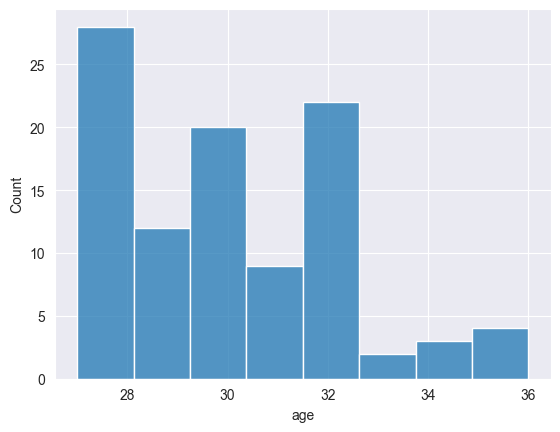

In [20]:
print(sns.histplot(unscale(x_fert.age, 18, 36)))

### hours_sitting
Number of hours spent sitting per day, from 1 to 16, scaled down to fit between 0 and 1. Also presuming that they did min-max-scaling, 
we can unscale the values to get a better understanding of the recorded numbers. 
For any analyses the scaled values will do fine though. 

Axes(0.125,0.11;0.775x0.77)


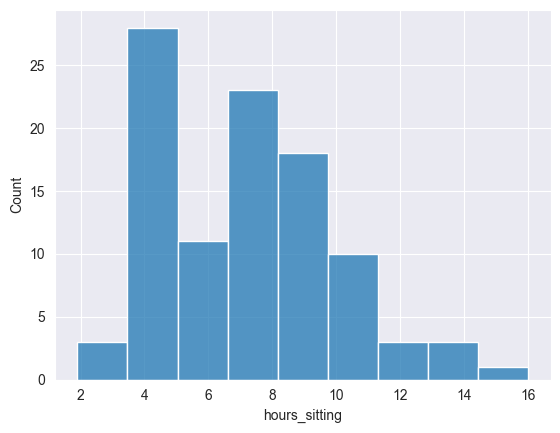

In [21]:
print(sns.histplot(unscale(x_fert.hours_sitting, 1, 16)))

### child_diseases, accident, surgery
All three are basically one-hot-encoded, but they stored 0 for "yes" and 1 for "no". 
For consistency, we will reverse that.


In [22]:
x_fert.child_diseases = x_fert.child_diseases.apply(lambda x: 1 if x == 0 else 0)
x_fert.accident = x_fert.accident.apply(lambda x: 1 if x == 0 else 0)
x_fert.surgery = x_fert.surgery.apply(lambda x: 1 if x == 0 else 0)

### fever_recent
Whether the patient has had high fevers within 3 months before the eximanation (-1), more than 3 months prior (0) or never (1). Whether one-hot-encoding is best for predictions depends on the model, but we will assume it is for now. It might be a logical issue to presume a fixed difference between the influence of high fever haivng occurred within 3 or more than 3 months or in fact never. We apply similar reasoning for the other variables with more than 2 levels. 

In [23]:
x_fert.high_fever

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: high_fever, Length: 100, dtype: float64

<Axes: xlabel='high_fever', ylabel='Count'>

,season,age,child_diseases,accident,surgery,high_fever,alcohol,smoking,hours_sitting,fall,spring,summer,winter,fever_never,fever_not_recent,fever_recent
0,spring,0.69,1,0,0,not_recent,0.8,0.0,0.88,0,1,0,0,0,1,0
1,spring,0.94,0,1,0,not_recent,0.8,1.0,0.31,0,1,0,0,0,1,0
2,spring,0.50,0,1,1,not_recent,1.0,-1.0,0.50,0,1,0,0,0,1,0
3,spring,0.75,1,0,0,not_recent,1.0,-1.0,0.38,0,1,0,0,0,1,0
4,spring,0.67,0,0,1,not_recent,0.8,-1.0,0.50,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,winter,0.67,0,1,1,not_recent,1.0,-1.0,0.50,0,0,0,1,0,1,0
96,winter,0.61,0,1,1,not_recent,0.8,0.0,0.50,0,0,0,1,0,1,0
97,winter,0.67,0,0,0,not_recent,1.0,-1.0,0.31,0,0,0,1,0,1,0
98,winter,0.64,0,1,0,not_recent,1.0,0.0,0.19,0,0,0,1,0,1,0


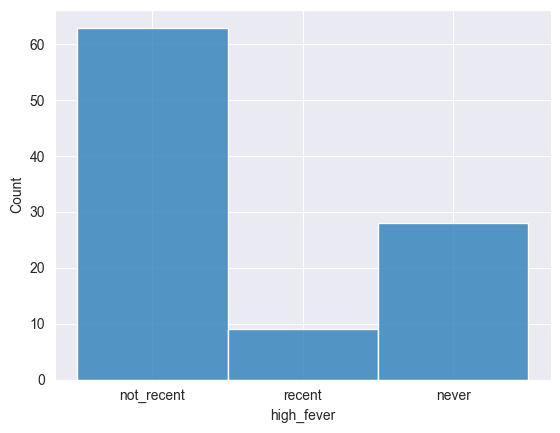

In [24]:
x_fert.high_fever = x_fert.high_fever.apply(
    lambda x: "recent" if x==-1 else ("not_recent" if x==0 else ("never" if x==1 else x))
)
display(sns.histplot(x_fert.high_fever))
x_fert = one_hot(x_fert, "high_fever", prefix="fever_")
x_fert

### smoking
The patient's smoking habit as a nominal variable: -1 for never, 0 for occasionally and 1 for daily. 

<Axes: xlabel='smoking', ylabel='Count'>

,season,age,child_diseases,accident,surgery,high_fever,alcohol,smoking,hours_sitting,fall,spring,summer,winter,fever_never,fever_not_recent,fever_recent,smoking_daily,smoking_never,smoking_occasionally
0,spring,0.69,1,0,0,not_recent,0.8,occasionally,0.88,0,1,0,0,0,1,0,0,0,1
1,spring,0.94,0,1,0,not_recent,0.8,daily,0.31,0,1,0,0,0,1,0,1,0,0
2,spring,0.50,0,1,1,not_recent,1.0,never,0.50,0,1,0,0,0,1,0,0,1,0
3,spring,0.75,1,0,0,not_recent,1.0,never,0.38,0,1,0,0,0,1,0,0,1,0
4,spring,0.67,0,0,1,not_recent,0.8,never,0.50,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,winter,0.67,0,1,1,not_recent,1.0,never,0.50,0,0,0,1,0,1,0,0,1,0
96,winter,0.61,0,1,1,not_recent,0.8,occasionally,0.50,0,0,0,1,0,1,0,0,0,1
97,winter,0.67,0,0,0,not_recent,1.0,never,0.31,0,0,0,1,0,1,0,0,1,0
98,winter,0.64,0,1,0,not_recent,1.0,occasionally,0.19,0,0,0,1,0,1,0,0,0,1


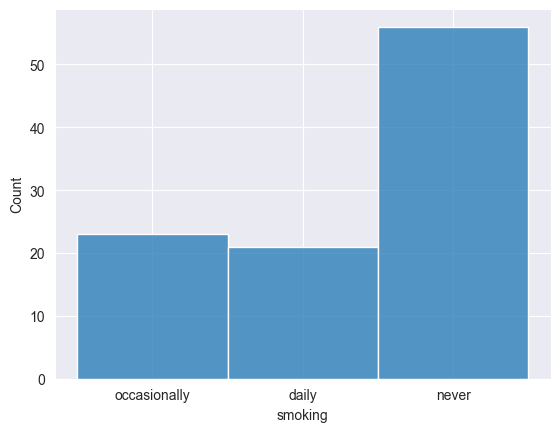

In [25]:
x_fert.smoking = x_fert.smoking.apply(
    lambda x: "never" if x==-1 else ("occasionally" if x==0 else ("daily" if x==1 else x))
)
display(sns.histplot(x_fert.smoking))
x_fert = one_hot(x_fert, "smoking", prefix="smoking_")
x_fert

### alcohol
This is yet another different approach to categorical value mapping. 
5 ordinal values mapped as values between 0.2 and 1 with steps of 0.2. 


<Axes: xlabel='alcohol', ylabel='Count'>

,season,age,child_diseases,accident,surgery,high_fever,alcohol,smoking,hours_sitting,fall,...,fever_not_recent,fever_recent,smoking_daily,smoking_never,smoking_occasionally,alcohol_daily,alcohol_rarely_or_never,alcohol_several_daily,alcohol_several_weekly,alcohol_weekly
0,spring,0.69,1,0,0,not_recent,weekly,occasionally,0.88,0,...,1,0,0,0,1,0,0,0,0,1
1,spring,0.94,0,1,0,not_recent,weekly,daily,0.31,0,...,1,0,1,0,0,0,0,0,0,1
2,spring,0.50,0,1,1,not_recent,rarely_or_never,never,0.50,0,...,1,0,0,1,0,0,1,0,0,0
3,spring,0.75,1,0,0,not_recent,rarely_or_never,never,0.38,0,...,1,0,0,1,0,0,1,0,0,0
4,spring,0.67,0,0,1,not_recent,weekly,never,0.50,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,winter,0.67,0,1,1,not_recent,rarely_or_never,never,0.50,0,...,1,0,0,1,0,0,1,0,0,0
96,winter,0.61,0,1,1,not_recent,weekly,occasionally,0.50,0,...,1,0,0,0,1,0,0,0,0,1
97,winter,0.67,0,0,0,not_recent,rarely_or_never,never,0.31,0,...,1,0,0,1,0,0,1,0,0,0
98,winter,0.64,0,1,0,not_recent,rarely_or_never,occasionally,0.19,0,...,1,0,0,0,1,0,1,0,0,0


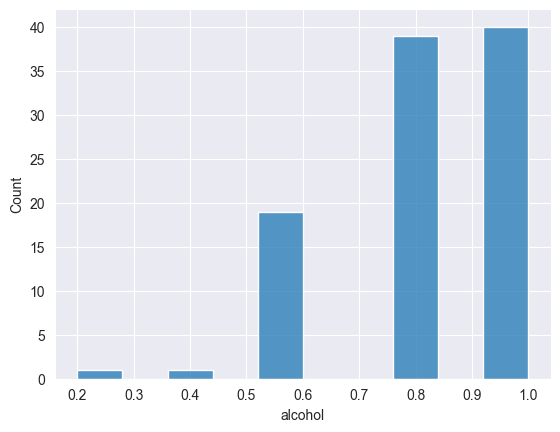

In [26]:
display(sns.histplot(x_fert.alcohol))

x_fert.alcohol = x_fert.alcohol.apply(
    lambda x: "several_daily" if x==0.2 else ("daily" if x==0.4 else 
              ("several_weekly" if x==0.6 else ("weekly" if x==0.8 else 
            ("rarely_or_never" if x==1 else x))))
)
x_fert = one_hot(x_fert, "alcohol", prefix="alcohol_")
x_fert

### Class labels

total number of patients: 100
normal (1): 88 ——— altered (2): 12


<Axes: xlabel='fertility', ylabel='Count'>

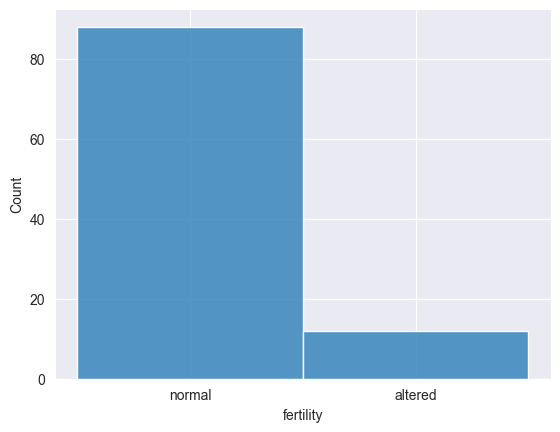

In [27]:
y_fert = y_fert.rename("fertility")
print("total number of patients:", y_fert.count())
print("normal (1):", y_fert[y_fert=="1"].count(), "——— altered (2):", y_fert[y_fert=="2"].count())
sns.histplot(y_fert.apply(lambda a: "normal" if a=="1" else "altered"))

The classes can have either the values "normal" or "altered" for the diagnosed level of fertility. The data description on OpenML does not specify explicitly, whether 1 or 2 are "normal", but the distribution shows a crass difference between the occurrences of the classes and we presume that the majority of the sample has "normal" fertility. 

In [28]:
# turn class labels to one-hot encoding: 
# 0 is "normal", 1 is "altered"
y_fert = y_fert.apply(lambda x: 0 if x=="1" else 1)
print(y_fert)
print(y_fert.value_counts())

0     0
1     1
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: fertility, Length: 100, dtype: category
Categories (2, int64): [0 < 1]
fertility
0    88
1    12
Name: count, dtype: int64


In [29]:
fertility = pd.concat([y_fert, x_fert], axis=1)
fertility.fertility = fertility.fertility.astype(int)
fertility

,fertility,season,age,child_diseases,accident,surgery,high_fever,alcohol,smoking,hours_sitting,...,fever_not_recent,fever_recent,smoking_daily,smoking_never,smoking_occasionally,alcohol_daily,alcohol_rarely_or_never,alcohol_several_daily,alcohol_several_weekly,alcohol_weekly
0,0,spring,0.69,1,0,0,not_recent,weekly,occasionally,0.88,...,1,0,0,0,1,0,0,0,0,1
1,1,spring,0.94,0,1,0,not_recent,weekly,daily,0.31,...,1,0,1,0,0,0,0,0,0,1
2,0,spring,0.50,0,1,1,not_recent,rarely_or_never,never,0.50,...,1,0,0,1,0,0,1,0,0,0
3,0,spring,0.75,1,0,0,not_recent,rarely_or_never,never,0.38,...,1,0,0,1,0,0,1,0,0,0
4,1,spring,0.67,0,0,1,not_recent,weekly,never,0.50,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,winter,0.67,0,1,1,not_recent,rarely_or_never,never,0.50,...,1,0,0,1,0,0,1,0,0,0
96,0,winter,0.61,0,1,1,not_recent,weekly,occasionally,0.50,...,1,0,0,0,1,0,0,0,0,1
97,0,winter,0.67,0,0,0,not_recent,rarely_or_never,never,0.31,...,1,0,0,1,0,0,1,0,0,0
98,0,winter,0.64,0,1,0,not_recent,rarely_or_never,occasionally,0.19,...,1,0,0,0,1,0,1,0,0,0


In [30]:
means = fertility._get_numeric_data().groupby("fertility").mean().transpose().reset_index().rename(columns={'index': 'var',
                                                                                                           0: 'normal',
                                                                                                           1: 'altered'})
means_long = pd.melt(means, id_vars='var', value_vars=["normal", "altered"], var_name="fertility")
means_long

,var,fertility,value
0,age,normal,0.663864
1,child_diseases,normal,0.125000
2,accident,normal,0.534091
3,surgery,normal,0.500000
4,hours_sitting,normal,0.405227
5,fall,normal,0.284091
6,spring,normal,0.375000
7,summer,normal,0.034091
8,winter,normal,0.306818
9,fever_never,normal,0.295455


[Text(0.5, 0, ''), Text(0, 0.5, 'probability of patient having the attribute')]

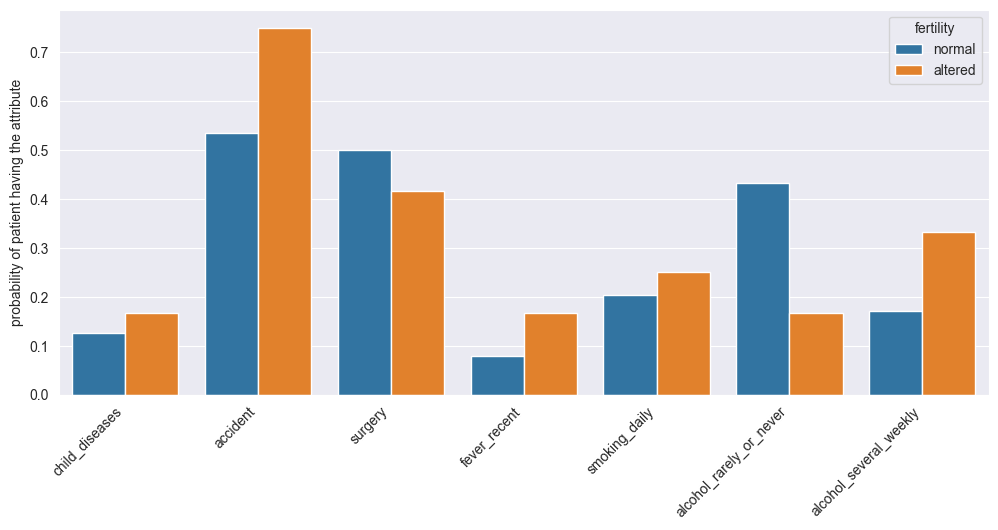

In [31]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.xticks(rotation=45, horizontalalignment='right')


var_selection = ["child_diseases", "accident", "surgery", "fever_recent", "smoking_daily", "smoking_neer", 
                 "alcohol_rarely_or_never", "alcohol_several_weekly"]

p=sns.barplot(
    x="var",
    y="value",
    hue="fertility",
    data=means_long[means_long["var"].isin(var_selection)]
)
p.set(xlabel="", ylabel="probability of patient having the attribute")

In [32]:
means_long

,var,fertility,value
0,age,normal,0.663864
1,child_diseases,normal,0.125000
2,accident,normal,0.534091
3,surgery,normal,0.500000
4,hours_sitting,normal,0.405227
5,fall,normal,0.284091
6,spring,normal,0.375000
7,summer,normal,0.034091
8,winter,normal,0.306818
9,fever_never,normal,0.295455


In [33]:
# splitting the data
x_fert_train, x_fert_test, y_fert_train, y_fert_test = train_test_split(x_fert, y_fert, test_size=0.2, random_state=0, stratify=y_fert)

In [70]:
# saving datasets for later
with open("data/fertility/fertility_preprocessed.pickle", "wb") as f:
    pickle.dump([x_fert_train, y_fert_train, x_fert_test, y_fert_test], f, protocol=pickle.HIGHEST_PROTOCOL)


## Dataset 3: Amazon Reviews

No proper metadata or qualitative information about this and the following dataset have been provided. Therefore, any predictions and analyses will be based on the data itself and shan't be interpreted to draw any conclusions about the real world. It is merely an exercise in data analysis and prediction.

In [40]:
reviews_train = pd.read_csv('data/reviews/amazon_review_ID.shuf.lrn.csv')
reviews_test = pd.read_csv('data/reviews/amazon_review_ID.shuf.tes.csv')

y_reviews_train = reviews_train.Class
x_reviews_train = reviews_train.drop(["ID", "Class"], axis=1)


In [41]:
print(y_reviews_train.nunique())
print(y_reviews_train.value_counts())

50
Class
Calvinnme      21
Walters        21
Nigam          20
Wilson         20
Davisson       19
Chachra        19
Sherwin        18
Vernon         18
Kolln          18
Power          18
Lee            17
Brody          17
Koenig         17
Neal           17
Hayes          17
Harp           17
CFH            17
Auken          17
Brown          16
Grove          16
Engineer       15
Lawyeraau      15
Shea           15
Mitchell       15
Mark           15
Cutey          15
Chell          14
Taylor         14
Peterson       14
Ashbacher      14
Cholette       14
Janson         14
Chandler       14
Mahlers2nd     14
Riley          14
Agresti        13
Messick        13
Lovitt         13
Bukowsky       12
Vision         12
Corn           12
Robert         12
Merritt        12
Blankenship    12
Dent           11
Johnson        11
Goonan         11
Morrison       11
Comdet         10
McKee           9
Name: count, dtype: int64


In [42]:
print(x_reviews_train)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V9991  V9992  V9993  V9994  \
0    14   9   8  12   7   4   5   3   2    2  ...      2      0      1      0   
1    12   3   8   6   5   3   2   3   2    0  ...      0      0      0      0   
2    17   5   7  12   8   3   0   3   2    3  ...      0      0      1      0   
3     9   6  10   6   4   7   7   3   3    3  ...      0      0      0      0   
4     8   4   5   5   1   7   0   0   0    0  ...      0      0      0      3   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...    ...   
745   9   4   3   4   6   7   2   1   0    1  ...      0      1      1      1   
746  13   6   1  13   2   5   7   5   3    1  ...      0      0      0      0   
747  19   9  12   3   9   7   5   2   5    2  ...      2      1      0      0   
748   5  14  16   7   2  12   9   3   7    4  ...      0      0      0      0   
749   7  10   4   4   9   0   2   8   1    2  ...      0      0      0      1   

     V9995  V9996  V9997  V

In [43]:
print("Number of NAs in the dataset:", x_reviews_train.isna().sum().sum())

Number of NAs in the dataset: 0


In [44]:
reviews_test_ID = reviews_test['ID']
reviews_test = reviews_test.drop("ID", axis=1)
reviews_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,12,8,9,10,9,4,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
1,7,6,2,5,1,7,9,5,4,11,...,4,0,0,0,0,0,0,0,0,0
2,9,7,3,7,5,3,1,2,5,1,...,0,0,0,0,0,1,0,1,0,0
3,7,7,6,6,5,2,14,0,9,8,...,0,0,0,0,0,0,0,0,1,0
4,26,13,11,15,6,4,3,5,4,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,14,5,4,11,7,4,2,3,2,0,...,0,0,0,0,0,1,0,0,0,0
746,13,13,6,3,12,5,4,2,4,10,...,0,0,1,0,0,1,0,0,2,0
747,12,9,2,4,2,4,2,8,5,1,...,0,0,0,0,0,0,0,0,0,0
748,7,5,4,7,10,2,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


all variables appear to be some sort of rating, I guess either number of views (streams/clicks) or a certain number given as a rating. its not a likert rating, as the numbers per product even go up to over 30. if we had any evidence that the ratings were a fixed scale we could use the numbers as is, but since we do ot have that I guess it might be wise to scale the data (but make the step optional just in case)


let's stick with mix-max-scaling

In [45]:
# shuffle the data
x_reviews_train, y_reviews_train = shuffle(x_reviews_train, y_reviews_train)


In [46]:
# preprocessing

# apply the preprocessing pipeline, to both the training and test data
x_reviews_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(x_reviews_train))
# salvage the column names
x_reviews_train_preprocessed.columns = x_reviews_train.columns

# apply the preprocessing pipeline, to both the training and test data
x_reviews_test_preprocessed = pd.DataFrame(preprocessor.fit_transform(reviews_test))
# salvage the column names
x_reviews_test_preprocessed.columns = reviews_test.columns



In [74]:
with open('data/reviews/preprocessed_reviews_data.pickle', 'wb') as handle:
        pickle.dump([x_reviews_train_preprocessed, y_reviews_train, x_reviews_test_preprocessed, reviews_test_ID], handle)

In [72]:
x_reviews_train_preprocessed

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,0.28125,0.428571,0.40,0.08,0.291667,0.333333,0.000000,0.500000,0.230769,0.263158,...,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0
1,0.40625,0.523810,0.25,0.52,0.166667,0.200000,0.111111,0.214286,0.153846,0.000000,...,0.25,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.333333,0.0
2,0.53125,0.285714,0.20,0.44,0.458333,0.333333,0.611111,0.500000,0.692308,0.105263,...,0.00,0.000000,0.00,0.2,0.0,0.00,0.333333,0.000000,0.000000,0.0
3,0.50000,0.428571,0.90,0.68,0.083333,0.666667,0.000000,0.571429,0.384615,0.105263,...,0.00,0.000000,0.00,0.0,0.0,0.25,0.000000,0.000000,0.000000,0.0
4,0.09375,0.190476,0.15,0.04,0.208333,0.133333,0.500000,0.071429,0.307692,0.052632,...,0.25,0.000000,0.00,0.0,0.0,0.00,0.000000,0.333333,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.18750,0.190476,0.05,0.08,0.166667,0.066667,0.000000,0.000000,0.076923,0.052632,...,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0
746,0.37500,0.428571,0.30,0.40,0.250000,0.400000,0.000000,0.285714,0.076923,0.105263,...,0.00,0.000000,0.25,0.0,0.0,0.00,0.333333,0.000000,0.000000,0.0
747,0.34375,0.095238,0.10,0.20,0.208333,0.133333,0.333333,0.214286,0.384615,0.052632,...,0.00,0.166667,0.00,0.0,0.0,0.25,0.000000,0.000000,0.000000,0.0
748,0.28125,0.571429,0.55,0.28,0.125000,0.533333,0.388889,0.214286,0.384615,0.210526,...,0.00,0.000000,0.00,0.0,0.0,0.00,0.000000,0.000000,0.333333,0.0


## Dataset 4: Congress

In [49]:
congress_train = pd.read_csv("data/congress/CongressionalVotingID.shuf.lrn.csv")
sample_solution = pd.read_csv("data/congress/CongressionalVotingID.shuf.sol.ex.csv")
x_congress_test = pd.read_csv("data/congress/CongressionalVotingID.shuf.tes.csv")

In [50]:
#Extracting independent variables
y_congress_train = congress_train['class']

In [51]:
#Extract dependent variable
x_congress_train = congress_train.drop(["ID", "class"], axis=1)
congress_test_ID=pd.DataFrame(x_congress_test['ID'])
x_congress_test = x_congress_test.drop(["ID"], axis=1)
congress_test_ID

,ID
0,102
1,413
2,30
3,298
4,95
...,...
212,179
213,256
214,278
215,264


In [52]:
x_congress_summary = x_congress_train.describe()
x_congress_summary

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
unique,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,n,n,y,n,n,y,y,y,y,n,n,n,n,y,n,y
freq,110,99,131,130,110,131,126,128,105,108,134,125,103,112,108,130


In [53]:
total_unknown_rows = x_congress_train[x_congress_train.eq('unknown').any(axis=1)].shape[0]
print(total_unknown_rows)

107


In [54]:
# shuffling the data
x_congress_train, y_congress_train = shuffle(x_congress_train, y_congress_train)
x_congress_test,congress_test_ID = shuffle(x_congress_test,congress_test_ID)

# Replacing all "unknown" values with the mode of the given column
x_congress_train.replace('unknown', pd.NA, inplace=True)
x_congress_test.replace('unknown', pd.NA, inplace=True)
# Replacing 'y' and 'n' with 1 and 0
x_congress_train.replace({'y': 1, 'n': 0}, inplace=True)
x_congress_test.replace({'y': 1, 'n': 0}, inplace=True)

# I have no clue why I need to do this replacement twice
# the original data stores NAs as "<NA>", which sklearn imputator cannot handle
# np.nan it can handle though
# when I run the second line of the following two, they are not replaced for some reason
# BUT!!! if I go the other direction first, and then replace it backwards again, it works
x_congress_train.replace({np.nan: "<NA>"}, inplace=True)
x_congress_train.replace({"<NA>": np.nan}, inplace=True)
#
x_congress_test.replace({np.nan: "<NA>"}, inplace=True)
x_congress_test.replace({"<NA>": np.nan}, inplace=True)


# applying the preprocessor
x_congress_train_processed = pd.DataFrame(preprocessor.fit_transform(x_congress_train))
x_congress_test_processed = pd.DataFrame(preprocessor.fit_transform(x_congress_test))
# salvage the original column names
x_congress_train_processed.columns = x_congress_train.columns
x_congress_test_processed.columns = x_congress_test.columns
x_congress_train_processed


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
214,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0
215,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
216,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [55]:
print("before")
print("NAs in training set:", x_congress_train.isna().sum().sum())
print("NAs in training set:", x_congress_test.isna().sum().sum())
print("after")
print("NAs in training set:", x_congress_train_processed.isna().sum().sum())
print("NAs in training set:", x_congress_test_processed.isna().sum().sum())

before
NAs in training set: 206
NAs in training set: 186
after
NAs in training set: 0
NAs in training set: 0


In [56]:
x_congress_summary.loc["freq"].max

<bound method Series.max of handicapped-infants                       110
water-project-cost-sharing                 99
adoption-of-the-budget-resolution         131
physician-fee-freeze                      130
el-salvador-aid                           110
religious-groups-in-schools               131
anti-satellite-test-ban                   126
aid-to-nicaraguan-contras                 128
mx-missile                                105
immigration                               108
synfuels-crporation-cutback               134
education-spending                        125
superfund-right-to-sue                    103
crime                                     112
duty-free-exports                         108
export-administration-act-south-africa    130
Name: freq, dtype: object>

In [75]:
with open('data/congress/preprocessed_congress_data.pickle', 'wb') as handle:
        pickle.dump([x_congress_train_processed, y_congress_train, x_congress_test_processed, congress_test_ID], handle)